 # 1.Importing Necessary Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

 ## 2.Reading Our Data set

In [2]:
train_titanic = pd.read_csv(r"../input/titanic/train.csv")

In [3]:
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Types of variable:
    1.Continuous - Age and Fare
    2.Categorical - Sex & Embarked
    3.Discrete - SibSp & Parch
    4.Alphanumeric : Cabin

In [4]:
print(f'The shape of our training set: {train_titanic.shape[0]} passenger and {train_titanic.shape[1]} features') #using Format-string 

The shape of our training set: 891 passenger and 12 features


In [5]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we get information that we have total 891 entries and some them have less than 891 entries like Age ,cabin and Embarked

<AxesSubplot:>

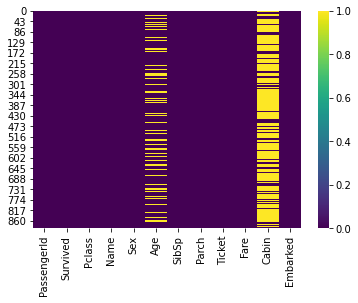

In [6]:
#Null Values
sns.heatmap(train_titanic.isnull(),cmap="viridis") #Age and Cabin feature contain most of null values

In [7]:
# Checking for Null Value
train_titanic.isnull().sum() #embark feature also contain null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So now we can see that we have null values
1.177 in Age
2.687 in Cabin
3.2 in Embarked

In [8]:
train_titanic['Survived'].value_counts() #Number of survived(1) and Not survived(0)

0    549
1    342
Name: Survived, dtype: int64

## Plotting heat Map to see correlation between the features

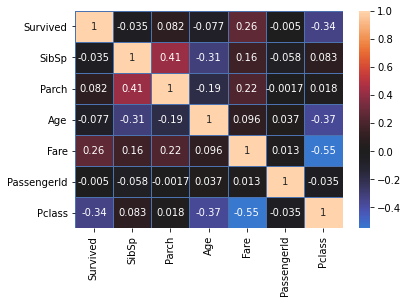

In [9]:
corr = sns.heatmap(train_titanic[["Survived","SibSp","Parch","Age","Fare","PassengerId","Pclass"]].corr(),
                  center=0,annot=True,linewidths=1,linecolor='b')
sns.set(rc={'figure.figsize':(8,8)})

Conclusion:Fare Feature have a higher correlation with survival probability

# 3.Exploratory Data Analysis

Now we are going to visualise the correlation of each variable with a target variable i.e Survived.

## (A). SibSp - Number of siblings /spouses aboard the titanic

In [10]:
train_titanic['SibSp'].unique() # unique value in feature SibSp

array([1, 0, 3, 4, 2, 5, 8])

In [11]:
print(train_titanic["SibSp"].value_counts()) #Number of sibling and spouse

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [12]:
single= train_titanic[(train_titanic['SibSp']==0)] #Number of People travelling alone or withing sibling or spouse
single['Survived'].value_counts(normalize=True) #people that survived or Not survived while travelling without sibling or spouse

0    0.654605
1    0.345395
Name: Survived, dtype: float64

65% people will not survived while travelling without spouse or sbiling whereas 34% people survived 

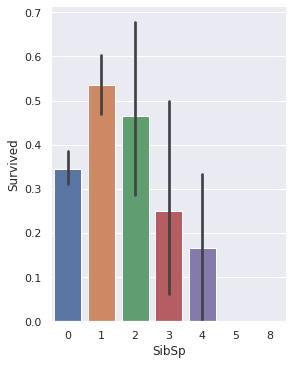

In [13]:
# passenger having 1 or 2 sibling have good chances of survival
# more no.of siblings ---> less chance of survival
bargraph = sns.catplot(x = "SibSp",y = "Survived",data =train_titanic, kind="bar", height=5,aspect=.8)

## (B).AGE

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


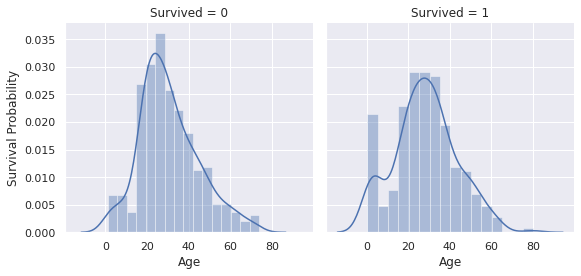

In [14]:
ageplot = sns.FacetGrid(train_titanic, col="Survived", height =4)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")


Conclusion:-As the age increase chances or survival decrease 

## (C). SEX

In [15]:
# Number of male and female which are survived or not survived
train_titanic.groupby('Sex')["Survived"].value_counts() 

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
# Survival Rate= How many male were alived / Total number of males?
train_titanic.groupby('Sex')['Survived'].value_counts()[3]/train_titanic['Sex'].value_counts()[0]*100 

18.890814558058924

In [17]:
# Survival Rate= How many female were alived / Total number of Females?
train_titanic.groupby('Sex')['Survived'].value_counts()[0]/train_titanic['Sex'].value_counts()[1]*100


74.20382165605095

<AxesSubplot:xlabel='Sex', ylabel='count'>

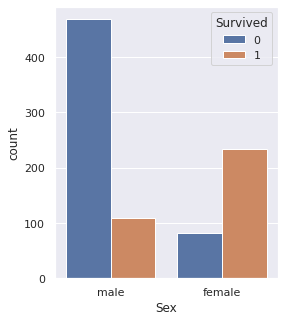

In [18]:
fig, ax = plt.subplots(figsize=(4, 5))
sns.countplot(x="Sex",hue="Survived",data=train_titanic,ax=ax) 

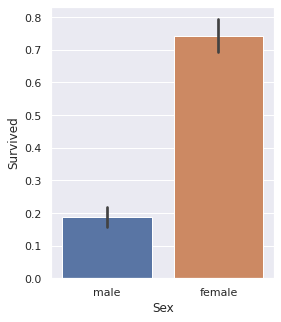

In [19]:
#Overall Survival Graph
fig, ax = plt.subplots(figsize=(4, 5))
Overall_survival = sns.barplot(x="Sex",y="Survived",data=train_titanic)

Female have more chances of survival than male

## (D) Pclass

In [20]:
train_titanic.groupby('Survived')["Pclass"].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

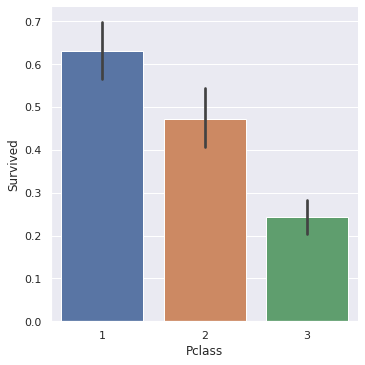

In [21]:
pclassplot = sns.catplot(x='Pclass',y= "Survived",data= train_titanic, kind='bar',height=5)

### (E) Pclass vs Gender

In [22]:
train_titanic.groupby("Sex")['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

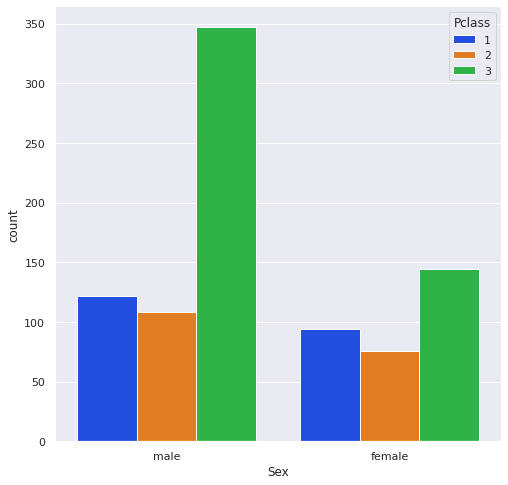

In [23]:
# fig, ax = plt.subplots(figsize=(4, 5)
sns.countplot(x="Sex",hue="Pclass",data=train_titanic,palette="bright")

Conclusion :- Number of passenger in male category is in greater extent in passenger class 3 similarly in female

In [24]:
#how many people were survived travelling in different passenger class based on gender
train_titanic.groupby(['Pclass','Sex'])["Survived"].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass,Sex,Survived'>

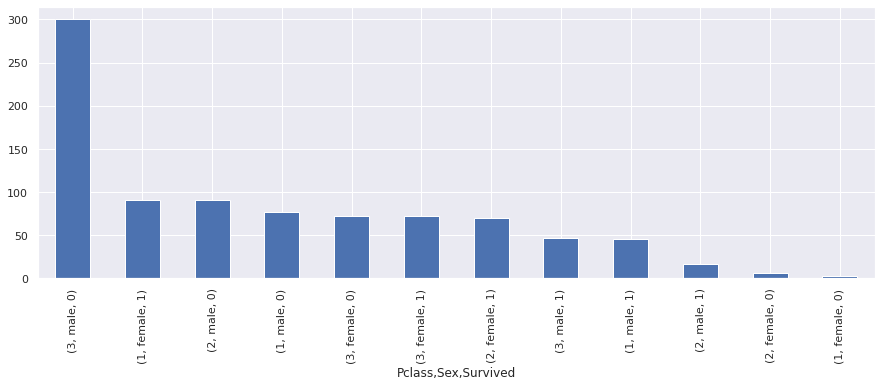

In [25]:
plt.figure(figsize=(15,5))
train_titanic.groupby(['Pclass','Sex'])['Survived'].value_counts().sort_values(ascending=False).plot(kind='bar')

Conclusion:- Number of males died in 3 passenger class is maximum because of number of males are in greater extent 

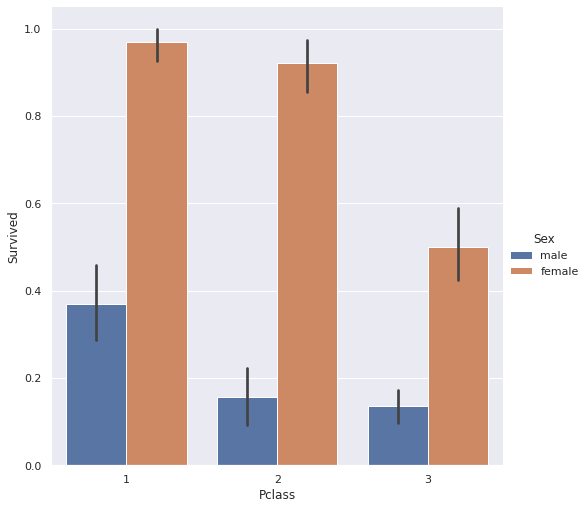

In [26]:
sns.catplot(x="Pclass",y="Survived",hue="Sex", data=train_titanic,height= 7,kind="bar")

In each class females have much higher chances of survival in comparison to male passengers.

## (F) Embarked

In [27]:
train_titanic['Embarked'].isnull().sum()

2

In [28]:
train_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Maximum number of passengers are from S Embarked

In [29]:
train_titanic['Embarked'].fillna('S',inplace=True)

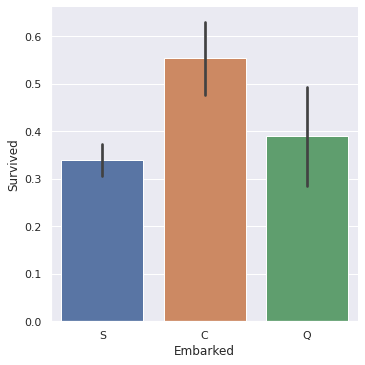

In [30]:
sns.catplot(x='Embarked',y="Survived",data=train_titanic, height=5, kind="bar")

## (G) Pclass vs Survived by Embarked

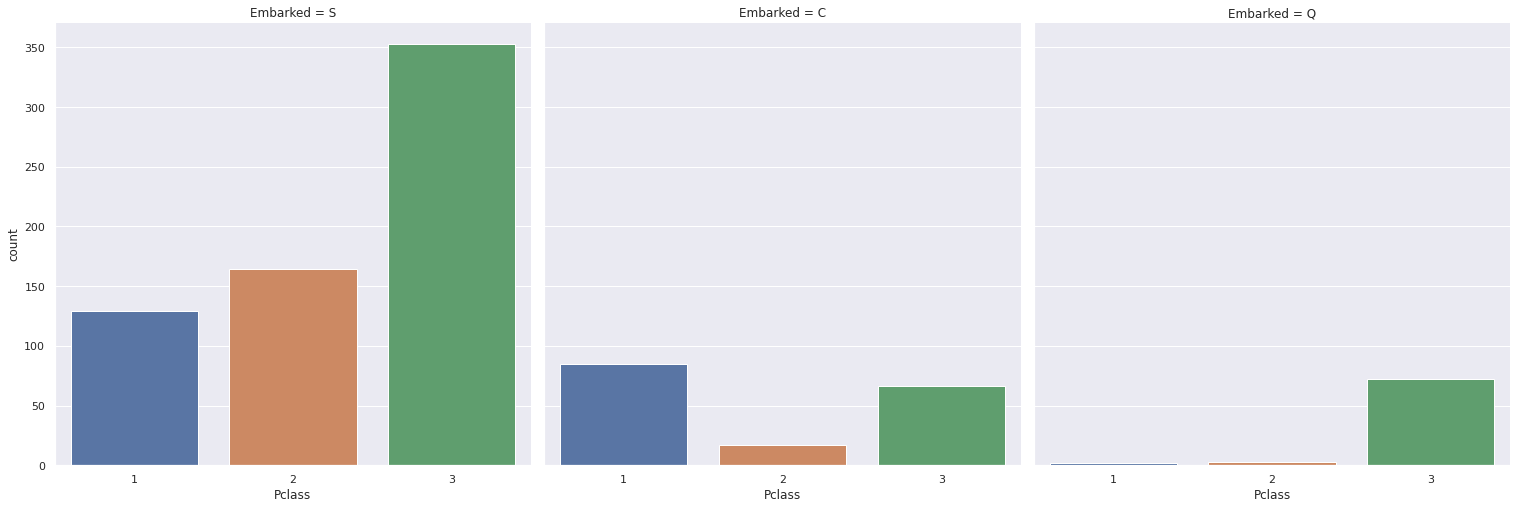

In [31]:
sns.catplot(x='Pclass',col='Embarked',data=train_titanic, height=7, kind = "count")

Conclusion:- Maximum passenger in embarked C is from 1st class that's why survival probability is higher

## (H) Fare

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


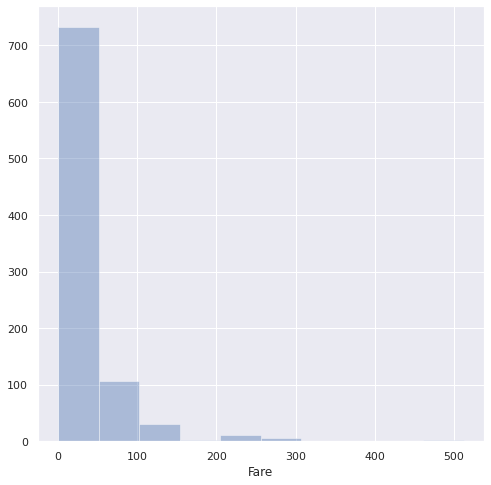

In [32]:
fare=sns.distplot(train_titanic['Fare'],kde=False, bins=10)

conclusion:- almost more than 700 passengers the fare price is between 0 to 50

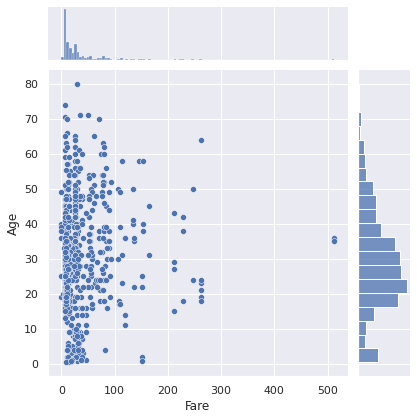

In [33]:
sns.jointplot(x='Fare',y='Age',data=train_titanic)

majority of passenger having fare price less than 100

In [34]:
train_titanic.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass,Sex'>

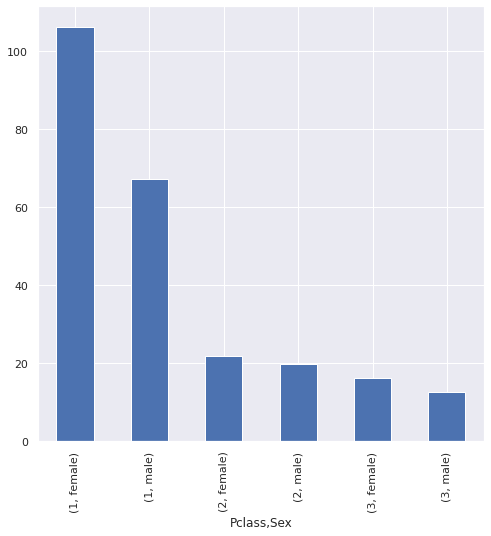

In [35]:
train_titanic.groupby(['Pclass','Sex'])['Fare'].mean().plot(kind='bar')

conclusion :- female from class 1 having fare price much greater than others

# 4.Data preprocessing or Data Cleaning

In [36]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### A.Handling missing values of Age 

In [37]:
# for age feature we calculate mean of age then fill missing value with them
train_titanic['Age'].fillna(train_titanic.Age.mean(), inplace=True)

In [38]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### B.Feature Engineering

In [39]:
col_drop =["PassengerId","Ticket","Cabin","Name"]
train_titanic.drop(col_drop,axis=1, inplace=True)
train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### C. One Hot Encoding

In [40]:
label = LabelEncoder()
train_titanic['Embarked']=label.fit_transform(train_titanic['Embarked'])


In [41]:
train_titanic['Sex']=label.fit_transform(train_titanic['Sex'])

In [42]:
train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# 5.Building Machine Learning Model

In [43]:
# Dependent(Y) and Independent Features(X)
X = train_titanic.drop("Survived",axis=1)
y = train_titanic['Survived'] # Target Column

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### feature Importance

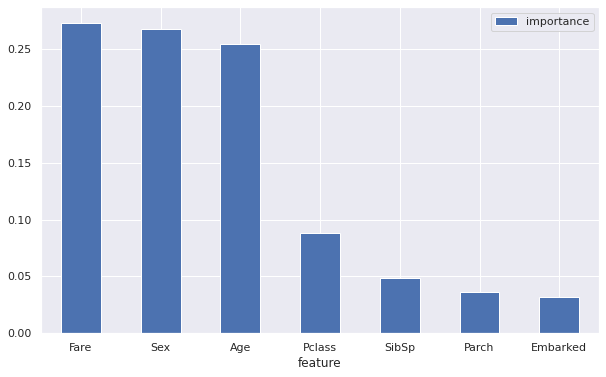

In [45]:
model = RandomForestClassifier()
plt.rcParams["figure.figsize"] = (10,6)
model.fit(X_train,Y_train)
importance = pd.DataFrame({'feature':X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=0)
plt.show()

In [46]:
rand_y_pred = model.predict(X_test)
rand_accuracy = accuracy_score(Y_test,rand_y_pred)*100
print("Accuracy =",rand_accuracy)

Accuracy = 80.44692737430168


## B.Logistic Regression

In [47]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
lr_predict = model1.predict(X_test)
lr_accuracy = accuracy_score(Y_test,lr_predict)*100

print("Accuracy =",lr_accuracy)

Accuracy = 81.00558659217877


## C.K-Neighbor Classifier

In [48]:
model3 = KNeighborsClassifier(5)
model3.fit(X_train,Y_train)
kNC_y_predict = model3.predict(X_test)
knc_accuracy = accuracy_score(Y_test,kNC_y_predict)*100
print("Accuracy =",knc_accuracy)

Accuracy = 70.94972067039106


## D. Decision Tress Classifier

In [49]:
model4 = tree.DecisionTreeClassifier()
model4 = model4.fit(X_train,Y_train)
dec_predict = model4.predict(X_test)
dec_accuracy = accuracy_score(Y_test,dec_predict)*100
print("Accuracy =", dec_accuracy)

Accuracy = 77.09497206703911


## E.Support Vector Machine

In [50]:
model5 = svm.SVC()
model5.fit(X_train,Y_train)
svm_pred = model5.predict(X_test)
svm_accuracy = accuracy_score(Y_test,svm_pred)*100
print("Accuracy =",svm_accuracy)

Accuracy = 65.92178770949721


## Accuracy for all classifier

In [51]:
print("Accuracy of Random Forest Classifier =",rand_accuracy)
print("Accuracy of Logistic Regressor =",lr_accuracy)
print("Accuracy of K-Neighbor Classifier =",knc_accuracy)
print("Accuracy of Decision Tree Classifier = ",dec_accuracy)
print("Accuracy of Support Vector Machine Classifier = ",svm_accuracy)

Accuracy of Random Forest Classifier = 80.44692737430168
Accuracy of Logistic Regressor = 81.00558659217877
Accuracy of K-Neighbor Classifier = 70.94972067039106
Accuracy of Decision Tree Classifier =  77.09497206703911
Accuracy of Support Vector Machine Classifier =  65.92178770949721


Maximum Accuracy Score with random Forest classifier on test set

#  Making Prediction for Test.csv

In [52]:
# Importing test.csv
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [54]:
test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data preprocessing for testing Data

In [55]:
# Replacing missing values of age column
mean = test_data["Age"].mean()
std = test_data["Age"].std()
rand_age = np.random.randint(mean-std, mean+std, size = 86)
age_slice = test_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
test_data["Age"] = age_slice

# Replacing missing value of Fare column
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [56]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
test_data.drop(col_to_drop, axis=1, inplace=True)
test_data.head(10)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [57]:
genders = {"male":0, "female":1}
test_data["Sex"] = test_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
test_data["Embarked"] = test_data["Embarked"].map(ports)

test_data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [58]:
x_test = test_data
y_pred = model.predict(x_test)
originaltest_data = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission.csv',index=False)
